<a href="https://colab.research.google.com/github/DiahKurnillah/Praktikum-Komputasi-Biomedis/blob/main/KombioPrak_ChapXII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 12. ODE: Euler’s method & Heun’s Method**
---
**Tujuan:** Untuk menentukan solusi persamaan diferensial biasa dengan menggunakan Metode Euler dan Heun.

**Literature Review**

**Metode Euler**

Persamaan diferensial dinyatakan dalam sebuah fungsi f(t,y) di mana adalah persamaan asli.
$$\frac{dy}{dt}=f(t,y),a≤t≤b,y(a)=∝$$
Diketahui bahwa nilai t berada dalam rentang a dan b dan jika kondisi awal adalah t = a maka y adalah á. Akan tetapi, kita tidak mengetahui bentuk formulasi persamaan aslinya untuk setiap nilai $y(t)$. Jadi tantangannya adalah bagaimana kita bisa mendapatkan solusi persamaan diferensial untuk setiap nilai $y(t)$, dimana t berada dalam interval [a, b]. Langkah awal dari pendekatan numerik adalah menentukan titik-titik dalam ukuran langkah dalam interval [a, b] sebagai:
$$h=\frac{(b-a)}{N}$$
di mana N adalah bilangan bulat positif dan $t_i=a+ih,i=0,1,2,…,N$
Metode Euler diturunkan dari Taylor. Sebagai contoh, fungsi y(t) adalah fungsi kontinu dan memiliki turunan dalam interval [a, b]. Dalam deret Taylor, fungsi y(t) dirumuskan sebagai:
$$y(t_{i+1} )=y(t_i )+(t_{i+1}-t_i ) y'^{(t_i) } +\frac{(t_{i+1}-t_i )^2  }{2} y''(ξ_i)$$
Dengan memasukkan persamaan $h=(t_{i+1}-t_i )_r$, kemudian
$$y(t_{i+1} )=y(t_i )+h_r y'^{(t_i )} +\frac{h_r^2}{2} y''(ξ_i)$$
Metode Euler dibangun berdasarkan persamaan di atas, dengan mengabaikan turunan kedua. Selain itu, secara umum notasi untuk digantikan oleh Jadi, metode Euler dirumuskan sebagai:
$$w_{i+1}=w_i+hf(t_i,w_i)$$,  dengan initial condition $w_0=α$, dimana $i = 0, 1, 2,…,N-1$.

**Metode Heun**

Metode Heun digunakan untuk meningkatkan estimasi solusi diferensial dengan menentukan dan kemudian merata-ratakan dua turunan untuk seluruh interval. Ingat kembali metode Euler
$$w_{i+1}^0=w_i+hf(t_i,w_i)$$
Dalam metode Heun, $𝑤𝑖+1$ bukanlah jawaban akhir, melainkan sebuah persamaan prediktor. Metode ini memberikan estimasi yang memungkinkan perhitungan kemiringan pada akhir interval:
$$w_{i+1}'=f(t_{i+1},w_{i+1}^0)$$
Kemudian, persamaan prediktor ini dikoreksi dengan merata-ratakan dua kemiringan, yang disebut persamaan korektor:
$$w_{i+1}=w_i+h \frac{f(t_i,w_i )+f(t_{i+1},w_{i+1}^0)}{2}$$


# Preliminary Task
Gunakan metode Euler dan metode Heun untuk mengintegrasikan $y'= 4e^{0.8t}-0.5y$. dari t = 0 sampai 4 dengan ukuran langkah satu. Kondisi awal pada t = 0 adalah y = 2. Perhatikan bahwa solusi yang tepat dapat ditentukan secara analitis sebagai:
$$y(t)=\frac{4}{1.3} (e^{0.8t}-e^{-0.5t} )+2e^{-0.5t}$$


In [ ]:
import numpy as np

def f_turunan(t, y):
    return 4 * np.exp(0.8 * t) - 0.5 * y

def exact_solution(t):
    return (4 / 1.3) * (np.exp(0.8 * t) - np.exp(-0.5 * t)) + 2 * np.exp(-0.5 * t)

def euler_method(t0, y0, h, N):
    t_values = [t0 + i * h for i in range(N + 1)]
    y_values = [y0]

    for i in range(N):
        y0 = y0 + h * f_turunan(t_values[i], y0)
        y_values.append(y0)

    return t_values, y_values

def heun_method(t0, y0, h, N):
    t_values = [t0 + i * h for i in range(N + 1)]
    y_values = [y0]

    for i in range(N):
        k1 = h * f_turunan(t_values[i], y0)
        k2 = h * f_turunan(t_values[i] + h, y0 + k1)
        y0 = y0 + 0.5 * (k1 + k2)
        y_values.append(y0)

    return t_values, y_values

t0 = 0
y0 = 2
h = 1
N = 4

# Hasil Eksak
t_exact = np.linspace(t0, t0 + N * h, 5)
y_exact = exact_solution(t_exact)

# Metode Euler
t_euler, y_euler = euler_method(t0, y0, h, N)

# Metode Heun
t_heun, y_heun = heun_method(t0, y0, h, N)

# Output
print("Solusi Eksak:")
for i in range(len(t_exact)):
    print(f"y({t_exact[i]}) = {y_exact[i]:.6f}")
print ()

print("Metode Euler:")
for i in range(len(t_euler)):
    print(f"y({t_euler[i]}) = {y_euler[i]:.6f}")

print("\nMetode Heun:")
for i in range(len(t_heun)):
    print(f"y({t_heun[i]}) = {y_heun[i]:.6f}")

Solusi Eksak:
y(0.0) = 2.000000
y(1.0) = 6.194631
y(2.0) = 14.843922
y(3.0) = 33.677172
y(4.0) = 75.338963

Metode Euler:
y(0) = 2.000000
y(1) = 5.000000
y(2) = 11.402164
y(3) = 25.513212
y(4) = 56.849311

Metode Heun:
y(0) = 2.000000
y(1) = 6.701082
y(2) = 16.319782
y(3) = 37.199249
y(4) = 83.337767


# Task 1
Kapasitor yang tidak terisi daya dihubungkan secara seri dengan resistor dan baterai. Diketahui bahwa Q = 12 Volt, C = 5.00 µF dan R = 8.00 x 10^5 Ohm. Ketika sakelar dihubungkan (t = 0), muatan belum ada (q = 0).

$$\frac{dq}{dt}=\frac{ϵ}{R}-\frac{q}{RC}$$
Solusi persamaan eksak adalah
$$q_{eksak}=q(t)=Cϵ(1-e^{-t/Rc})$$

Jika t0 = 0 maka a = 0 dan pada saat itu q0 = 0.0. Ukuran langkah h = 0,1 maka t1 = 0,1. Hitunglah muatan (q) pada saat t = 2 dengan menggunakan metode Euler dan Heun dan plotlah kurva muatan q pada interval t 0 sampai 2. Bandingkan hasilnya!


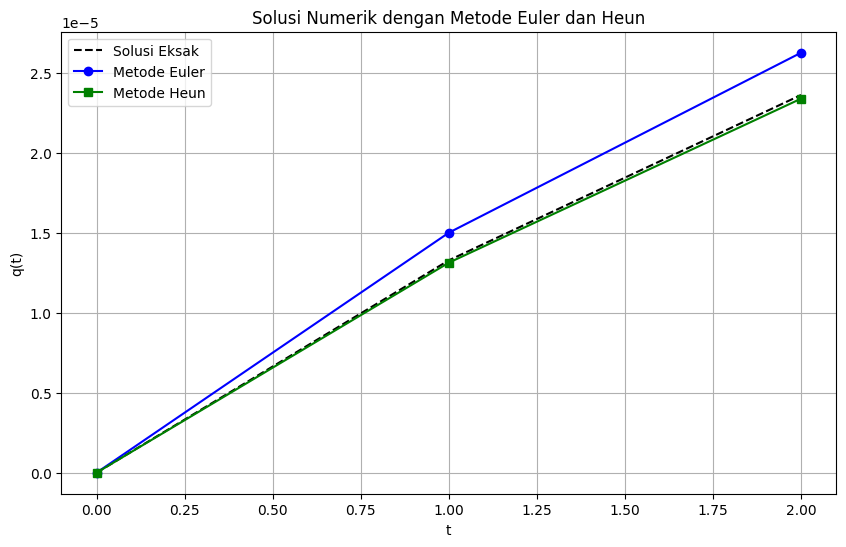

Solusi Eksak:
y(0.0) = 0.0
y(1.0) = 1.327195301571571e-05
y(2.0) = 2.3608160417242e-05

Metode Euler:
y(0.0) = 0.0
y(1.0) = 1.5e-05
y(2.0) = 2.625e-05

Metode Heun:
y(0.0) = 0.0
y(1.0) = 1.3125e-05
y(2.0) = 2.3378906250000003e-05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dq_dt(t, q):
    return epsilon / R - q / (R * C)

def euler_method(t0, q0, h, t_end):
    t_values = [t0 + i * h for i in range(int((t_end - t0) / h) + 1)]
    q_values = [q0]

    for i in range(len(t_values) - 1):
        t_new = t_values[i] + h
        q_new = q_values[-1] + h * dq_dt(t_values[i], q_values[-1])
        t_values.append(t_new)
        q_values.append(q_new)

    return np.array(t_values[:len(q_values)]), np.array(q_values)

def heun_method(t0, q0, h, t_end):
    t_values = [t0 + i * h for i in range(int((t_end - t0) / h) + 1)]
    q_values = [q0]

    for i in range(len(t_values) - 1):
        t_new = t_values[i] + h
        k1 = dq_dt(t_values[i], q_values[-1])
        k2 = dq_dt(t_new, q_values[-1] + h * k1)
        q_new = q_values[-1] + 0.5 * h * (k1 + k2)
        t_values.append(t_new)
        q_values.append(q_new)

    return np.array(t_values[:len(q_values)]), np.array(q_values)

# Parameter
epsilon = 12.0
C = 5e-6
R = 8e5
t0 = 0
q0 = 0.0
h = 1.0
t_end = 2.0


# Metode Euler
t_euler, q_euler = euler_method(t0, q0, h, t_end)

# Metode Heun
t_heun, q_heun = heun_method(t0, q0, h, t_end)

# Solusi eksak
t_exact = np.arange(t0, t_end + h, h)
q_exact = C * epsilon * (1 - np.exp(-t_exact / (R * C)))

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(t_exact, q_exact, label='Solusi Eksak', linestyle='--', color='black')
plt.plot(t_euler, q_euler, label='Metode Euler', marker='o', linestyle='-', color='blue')
plt.plot(t_heun, q_heun, label='Metode Heun', marker='s', linestyle='-', color='green')

plt.title('Solusi Numerik dengan Metode Euler dan Heun')
plt.xlabel('t')
plt.ylabel('q(t)')
plt.legend()
plt.grid(True)
plt.show()

# Tampilkan hasil
print("Solusi Eksak:")
for i in range(len(t_exact)):
    print(f"y({t_exact[i]}) = {q_exact[i]}")

print("\nMetode Euler:")
for i in range(len(t_euler)):
    print(f"y({t_euler[i]}) = {q_euler[i]:}")

print("\nMetode Heun:")
for i in range(len(t_heun)):
    print(f"y({t_heun[i]}) = {q_heun[i]:}")


# Task 2
Partikel virus HIV-1 menyerang limfosit dan membajak mesin genetiknya untuk memproduksi banyak partikel virus di dalam sel. Setelah partikel virus disiapkan dan dikemas, genom virus memprogram inang yang terinfeksi untuk mengalami lisis. Virion yang baru dirakit dilepaskan ke dalam aliran darah dan mampu menyerang sel-sel baru dan menyebarkan infeksi. Dinamika infeksi virus dan replikasi dalam plasma dapat dimodelkan dengan seperangkat persamaan diferensial (Perelson et al., 1996). Jika T adalah konsentrasi sel target, T* adalah konsentrasi sel yang terinfeksi, dan V1 adalah konsentrasi RNA virus yang menular dalam plasma, dan VX adalah konsentrasi partikel virus yang tidak menular dalam plasma, kita dapat menulis

$$\frac{dT^*}{dt}=kV_1 T-δT^*$$
$$\frac{dV_1}{dt}=-cV_1$$
$$\frac{dV_x}{dt}=NδT^*-cV_x$$
Studi eksperimental menghasilkan estimasi parameter laju reaksi sebagai berikut (Perelson et al., 1996):
δ = 0.5/day
c = 3.0/day
Initian konsentrasi dari T,T^*,V_1  dan V_X adalah
$$V_1 (t=0)=100/μl$$
$$V_X (t=0)=0/μl$$
$$T(t=0)=250 non-infected cells/µl$$ (Haase et al., 1996)
$$T^* (t=0)=10 infected cells/µl$$ (Haase et al., 1996)
Berdasarkan analisis quasi-steady state (dT*/dt = 0, dV/dt = 0) sebelum waktu t = 0, kami menghitung hal berikut:
$$k = 2𝑥10e-4 μl/day/virion$$, dan
$$N = 60$$ virion yang diproduksi per sel.
Hitung T*, V1, VX pada waktu t = 5 hari dengan menggunakan metode Euler dan plot kurva T*, V1, VX dalam interval waktu 0 sampai 5.


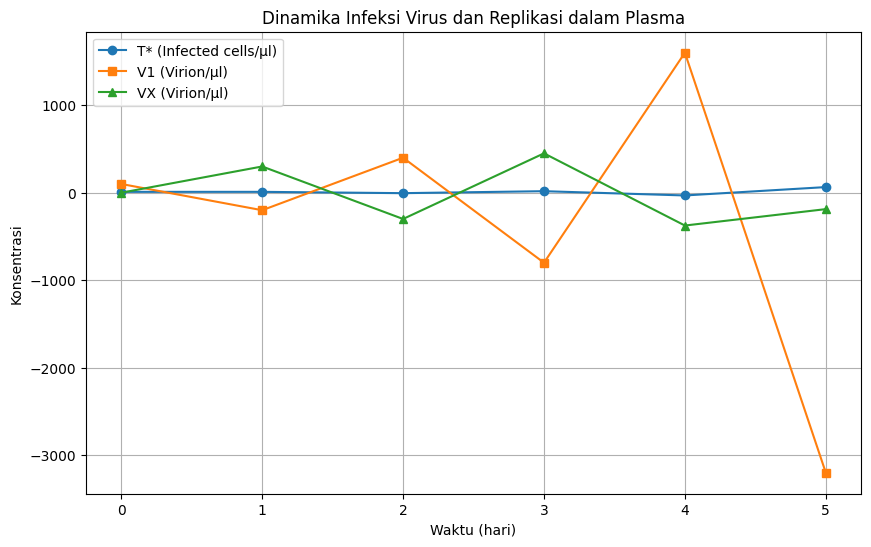

T* (Infected cells/µl):
t(0) = 10.0
t(1) = 10.0
t(2) = -5.0
t(3) = 17.5
t(4) = -31.25
t(5) = 64.375

V1 (Virion/µl):
t(0) = 100.0
t(1) = -200.0
t(2) = 400.0
t(3) = -800.0
t(4) = 1600.0
t(5) = -3200.0

VX (Virion/µl):
t(0) = 0.0
t(1) = 300.0
t(2) = -300.0
t(3) = 450.0
t(4) = -375.0
t(5) = -187.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
delta = 0.5
c = 3.0
k = 2e-4
N = 60

# Kondisi awal
T0 = 250  # non-infected cells/µl
T_star0 = 10  # infected cells/µl
V1_0 = 100  # virion/µl
VX_0 = 0  # virion/µl

# Waktu dan langkah
t0 = 0
t_end = 5
h = 1  # langkah waktu

# Metode Euler
def euler_method(delta, c, k, N, T, T_star, V1, VX, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    T_values = [T]
    T_star_values = [T_star]
    V1_values = [V1]
    VX_values = [VX]

    for t in t_values[1:]:
        dT_star = h * (k * V1 * T - delta * T_star)
        dV1 = h * (-c * V1)
        dVX = h * (N * delta * T_star - c * VX)

        T_star += dT_star
        V1 += dV1
        VX += dVX

        T_values.append(T)
        T_star_values.append(T_star)
        V1_values.append(V1)
        VX_values.append(VX)

    return np.array(t_values), np.array(T_values), np.array(T_star_values), np.array(V1_values), np.array(VX_values)

# Hitung solusi dengan metode Euler
t_values, T_values, T_star_values, V1_values, VX_values = euler_method(delta, c, k, N, T0, T_star0, V1_0, VX_0, h, t_end)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(t_values, T_star_values, label='T* (Infected cells/µl)', linestyle='-', marker='o')
plt.plot(t_values, V1_values, label='V1 (Virion/µl)', linestyle='-', marker='s')
plt.plot(t_values, VX_values, label='VX (Virion/µl)', linestyle='-', marker='^')

plt.title('Dinamika Infeksi Virus dan Replikasi dalam Plasma')
plt.xlabel('Waktu (hari)')
plt.ylabel('Konsentrasi')
plt.legend()
plt.grid(True)
plt.show()

# Tampilkan hasil
print("T* (Infected cells/µl):")
for i in range(len(t_values)):
    print(f"t({t_values[i]}) = {T_star_values[i]}")

print("\nV1 (Virion/µl):")
for i in range(len(t_values)):
    print(f"t({t_values[i]}) = {V1_values[i]}")

print("\nVX (Virion/µl):")
for i in range(len(t_values)):
    print(f"t({t_values[i]}) = {VX_values[i]}")


Pada hasil output running program, nilai T (Infected cells/µl) pada iterasi pertama (t=0), konsentrasi T* adalah 10.0. Pada iterasi kedua (t=1), konsentrasi T* tetap 10.0. Pada iterasi ketiga (t=2), konsentrasi T* tiba-tiba menjadi -5.0. Hal ini mungkin menunjukkan bahwa metode Euler memiliki kesulitan dalam menangani perubahan yang terjadi pada sistem pada titik ini, dan solusi numerik menjadi tidak stabil. Perubahan selanjutnya terjadi pada iterasi selanjutnya dengan fluktuasi nilai yang besar.
Pada hasil output running program, Konsentrasi V1 juga mengalami fluktuasi besar, dengan nilai yang berlipat ganda pada setiap iterasi. Hal ini menunjukkan bahwa solusi numerik dengan metode Euler dapat tidak stabil pada beberapa titik waktu.
Konsentrasi VX mengalami fluktuasi besar dengan nilai yang positif dan negatif secara bergantian. Hal ini juga mencerminkan ketidakstabilan solusi numerik. Ketidakstabilan solusi numerik dapat terjadi karena metode Euler tidak selalu memberikan hasil yang akurat atau stabil terutama pada kasus di mana perubahan cepat atau tiba-tiba terjadi pada system.
